Consider the dataset comprising of 109 cricket players (attached here with assignment), 
filename is ‘cricketers.csv’. Each row comprises of following details of a cricketer: 

matches_played: number of matches played by the player, 

innings_batted: number of times got the chance to bat,

runs_scored: total runs scores across all innings,

highest_runs: highest run scored taking all innings in account,

ball_faced: total balls faced across all innings,

average_runs: average runs scores taking all innings in account, 

strike_rate: it is computed as (runs_scored / balls_faced) x 100,

innings_bowled: number of times got the chance to bowl,

overs: number of overs bowled across all innings,

runs_given: total run given across all innings,

wickets_obtained: total wickets obtained across all innings,

average_runs_per_wicket: it is computed as (runs_given / wickets_obtained)

bowling_economy: average runs scored per over

# Q1 1. Given that K-means depends on distance metric, it is a convention to normalize the data attributes so that attributes are on the same scale.  So, in this first task, normalize all data attributes. [2 points]

# Importing Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer, normalize
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [52]:
dataset = pd.read_csv('cricketers_new.csv', delimiter='\t')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 14 columns):
PLAYER                      109 non-null object
matches_played              109 non-null int64
innings_batted              109 non-null int64
runs_scored                 109 non-null int64
highest_runs                109 non-null int64
balls_faced                 109 non-null int64
average_runs                109 non-null float64
strike_rate                 109 non-null float64
innings_bowled              109 non-null int64
overs                       109 non-null float64
runs_given                  109 non-null int64
wickets_obtained            109 non-null int64
average_runs_per_wicket     109 non-null float64
bowling_economy             109 non-null float64
dtypes: float64(5), int64(8), object(1)
memory usage: 12.0+ KB


In [53]:
dataset.sample(10)

,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
77,Sanju Samson,15,15,441,92,320,31.50,137.81,0,0.0,0,0,0.00,0.00
33,Hardik Pandya,13,13,260,50,195,28.88,133.33,13,42.4,381,18,21.16,8.92
81,Shardul Thakur,13,1,15,15,5,-0.00,300.00,13,46.4,431,16,26.93,9.23
76,Sam Billings,10,8,108,56,78,13.50,138.46,0,0.0,0,0,0.00,0.00
108,Ben Laughlin,0,0,0,0,0,0.00,0.00,7,21.0,212,9,22.44,10.04
94,Vijay Shankar,13,11,212,54,148,53.00,143.24,4,5.0,58,1,58.00,11.60
15,Chris Lynn,16,16,491,74,377,32.73,130.23,0,0.0,0,0,0.00,0.00
46,Krish0ppa Gowtham,15,13,126,33,64,14.00,196.87,15,40.0,312,11,28.36,7.80
31,Glenn Maxwell,12,12,169,47,120,14.08,140.83,10,16.0,132,5,26.40,8.25
83,Shivam Mavi,9,4,13,7,15,4.33,86.66,9,28.0,270,5,54.00,9.64


In [54]:
dataset.shape

(109, 14)

In [55]:
##### dataset_normalized = dataset[['matches_played','innings_batted','runs_scored','highest_runs','balls_faced','average_runs','strike_rate','innings_bowled','overs','runs_given','wickets_obtained','average_runs_per_wicket','bowling_economy']]
dataset = dataset[dataset.columns[1:14]]
dataset.sample(10)

,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
81,13,1,15,15,5,-0.00,300.00,13,46.4,431,16,26.93,9.23
47,14,13,228,41,157,22.80,145.22,13,40.1,284,12,23.66,7.07
86,14,14,411,93,310,37.36,132.58,0,0.0,0,0,0.00,0.00
52,15,13,284,62,246,25.81,115.44,0,0.0,0,0,0.00,0.00
9,9,6,96,37,58,24.00,165.51,7,17.0,168,2,84.00,9.88
29,6,6,162,67,129,32.40,125.58,0,0.0,0,0,0.00,0.00
46,15,13,126,33,64,14.00,196.87,15,40.0,312,11,28.36,7.80
100,0,0,0,0,0,0.00,0.00,1,4.0,47,0,-0.00,11.75
40,13,13,548,95,353,54.80,155.24,0,0.0,0,0,0.00,0.00
56,14,6,21,7,24,10.50,87.50,14,44.0,368,15,24.53,8.36


In [56]:
cols = ['matches_played', 'innings_batted', 'runs_scored', 'highest_runs',
       'balls_faced', 'average_runs', 'strike_rate', 'innings_bowled', 'overs',
       'runs_given', 'wickets_obtained', 'average_runs_per_wicket ',
       'bowling_economy']
dataset.columns = cols
dataset.sample(10)

,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
11,12,4,13,7,16,6.50,81.25,12,46.1,354,9,39.33,7.66
24,12,4,50,39,29,16.66,172.41,12,38.1,278,10,27.80,7.28
31,12,12,169,47,120,14.08,140.83,10,16.0,132,5,26.40,8.25
38,15,7,49,26,38,12.25,128.94,15,50.2,486,11,44.18,9.65
44,1,1,24,24,22,-0.00,109.09,0,0.0,0,0,0.00,0.00
86,14,14,411,93,310,37.36,132.58,0,0.0,0,0,0.00,0.00
96,7,6,65,35,38,21.66,171.05,7,20.0,192,4,48.00,9.60
101,0,0,0,0,0,0.00,0.00,10,37.0,264,12,22.00,7.13
22,4,3,26,13,33,13.00,78.78,4,11.5,101,4,25.25,8.53
69,17,7,59,34,31,11.80,190.32,17,68.0,458,21,21.80,6.73


In [57]:
dataset.isna().sum()

matches_played              0
innings_batted              0
runs_scored                 0
highest_runs                0
balls_faced                 0
average_runs                0
strike_rate                 0
innings_bowled              0
overs                       0
runs_given                  0
wickets_obtained            0
average_runs_per_wicket     0
bowling_economy             0
dtype: int64

In [58]:
dataset.describe()

,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.00000,109.000000,109.000000,109.000000
mean,9.559633,7.889908,173.633028,43.495413,124.669725,22.360092,122.258716,4.513761,13.894495,119.93578,3.926606,17.334862,5.149817
std,5.161164,4.982078,182.356522,29.830268,123.670265,16.093453,48.576709,5.449456,18.395495,152.80763,5.602094,21.910816,4.773435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-0.000000,0.000000
25%,5.000000,4.000000,36.000000,20.000000,33.000000,11.800000,109.090000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,10.000000,7.000000,99.000000,40.000000,76.000000,21.160000,130.260000,2.000000,3.000000,27.00000,0.000000,0.000000,7.280000
75%,14.000000,13.000000,260.000000,62.000000,188.000000,30.000000,146.040000,8.000000,26.000000,223.00000,6.000000,28.360000,9.230000
max,17.000000,17.000000,735.000000,128.000000,516.000000,75.830000,300.000000,17.000000,68.000000,533.00000,24.000000,108.000000,16.500000


In [59]:
# As we can see The mean and Standard Deviation for the dataet is varying in magnitude
# So lets us Normalize all the samples to unit Norm
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 13 columns):
matches_played              109 non-null int64
innings_batted              109 non-null int64
runs_scored                 109 non-null int64
highest_runs                109 non-null int64
balls_faced                 109 non-null int64
average_runs                109 non-null float64
strike_rate                 109 non-null float64
innings_bowled              109 non-null int64
overs                       109 non-null float64
runs_given                  109 non-null int64
wickets_obtained            109 non-null int64
average_runs_per_wicket     109 non-null float64
bowling_economy             109 non-null float64
dtypes: float64(5), int64(8)
memory usage: 11.2 KB


# Let us Normalize our dataset using SKlearn Preprocessig libarary which uses cosine similarity to noramalize the datatset

In [60]:
dataset_normalized = pd.DataFrame(normalize(dataset, norm='l2'), columns=dataset.columns)
dataset_normalized.sample(10)

,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
106,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025273,0.092667,0.964583,0.016849,0.241146,0.043806
40,0.019139,0.019139,0.806774,0.139860,0.519692,0.080677,0.228547,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
94,0.041051,0.034736,0.669449,0.170520,0.467351,0.167362,0.452320,0.012631,0.015789,0.183151,0.003158,0.183151,0.036630
65,0.026633,0.026633,0.724996,0.192346,0.473467,0.080549,0.453108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
36,0.037890,0.032477,0.744263,0.167797,0.497979,0.062004,0.404473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
64,0.035145,0.016401,0.063262,0.028116,0.079663,0.015815,0.186060,0.035145,0.114808,0.965328,0.032802,0.068932,0.019681
79,0.029793,0.022783,0.418850,0.061338,0.345245,0.038065,0.212597,0.029793,0.099893,0.799145,0.024535,0.057079,0.014020
13,0.019012,0.019012,0.356469,0.204376,0.228140,0.118823,0.742644,0.019012,0.048004,0.446774,0.023765,0.089355,0.043917
56,0.036451,0.015622,0.054676,0.018225,0.062487,0.027338,0.227817,0.036451,0.114560,0.958135,0.039054,0.063867,0.021766
42,0.018580,0.018580,0.803310,0.091807,0.563956,0.057379,0.155678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [61]:
noramalizer = Normalizer()
dataset_normalized = noramalizer.transform(dataset_normalized)
dataset_normalized

array([[0.04416418, 0.03974776, 0.59180004, ..., 0.        , 0.        ,
        0.        ],
       [0.02035073, 0.01865483, 0.81402914, ..., 0.        , 0.        ,
        0.        ],
       [0.01374993, 0.01374993, 0.28874847, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.01684861, 0.24114569,
        0.04380638],
       [0.        , 0.        , 0.        , ..., 0.04262017, 0.19434798,
        0.08694515],
       [0.        , 0.        , 0.        , ..., 0.04190838, 0.10449157,
        0.04675113]])

In [62]:
dataset_normalized.shape

(109, 13)

In [63]:
normalized_Data = pd.DataFrame({'matches_played': dataset_normalized[:, 0],'innings_batted': dataset_normalized[:, 1],
                               'runs_scored': dataset_normalized[:, 2], 'highest_runs': dataset_normalized[:, 3],
                               'balls_faced': dataset_normalized[:, 4],'average_runs': dataset_normalized[:, 5],
                               'strike_rate': dataset_normalized[:, 6], 'innings_bowled': dataset_normalized[:, 7],
                               'overs': dataset_normalized[:, 8],'runs_given': dataset_normalized[:, 9],
                               'wickets_obtained': dataset_normalized[:, 10], 'average_runs_per_wicket': dataset_normalized[:, 11],
                               'bowling_economy': dataset_normalized[:, 12]})
normalized_Data.sample(10)

,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
42,0.018580,0.018580,0.803310,0.091807,0.563956,0.057379,0.155678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
39,0.029621,0.023697,0.044431,0.023697,0.062203,0.008886,0.211551,0.029621,0.114040,0.962672,0.044431,0.064158,0.024763
77,0.026280,0.026280,0.772640,0.161186,0.560646,0.055189,0.241446,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.029167,0.025521,0.576048,0.160419,0.311722,0.052355,0.336861,0.027344,0.068360,0.647143,0.023698,0.049766,0.017099
34,0.018687,0.007475,0.224245,0.134547,0.123335,0.224245,0.679499,0.018687,0.064657,0.624148,0.026162,0.089137,0.035655
46,0.037434,0.032443,0.314446,0.082355,0.159719,0.034938,0.491310,0.037434,0.099824,0.778629,0.027452,0.070775,0.019466
104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049560,0.066080,0.693836,0.016520,0.693836,0.173459
24,0.035412,0.011804,0.147551,0.115090,0.085580,0.049164,0.508785,0.035412,0.112434,0.820383,0.029510,0.082038,0.021483
14,0.022789,0.022789,0.762407,0.215463,0.522083,0.084693,0.302539,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,0.044164,0.039748,0.591800,0.203155,0.441642,0.073975,0.635964,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# 2. Write your own code for K-means algorithm using two attributes namely average_runs and bowling_economy. Take K=2. Plot clusters on a scatter plot with X and Y being the two attributes namely average_runs and bowling_economy, respectively. Color data points belonging to the first cluster with red and the second cluster with blue. Copy the plot diagram in the word document and interpret the output. [3 points]

In [64]:
normalized_Data = normalized_Data
normalized_Data = normalized_Data[['runs_scored','bowling_economy']]
X = normalized_Data.values
X

array([[0.59180004, 0.        ],
       [0.81402914, 0.        ],
       [0.28874847, 0.        ],
       [0.73371899, 0.        ],
       [0.63534358, 0.        ],
       [0.80532392, 0.        ],
       [0.57604828, 0.01709915],
       [0.06900208, 0.01725052],
       [0.28479045, 0.0298318 ],
       [0.34427587, 0.03543172],
       [0.46630741, 0.0194612 ],
       [0.03518019, 0.02072925],
       [0.58538946, 0.        ],
       [0.35646899, 0.04391698],
       [0.76240668, 0.        ],
       [0.76941755, 0.        ],
       [0.18777011, 0.0416768 ],
       [0.07919342, 0.0482614 ],
       [0.4877949 , 0.03202318],
       [0.36040575, 0.        ],
       [0.11467324, 0.08944513],
       [0.57790527, 0.03180992],
       [0.18662169, 0.06122627],
       [0.46798916, 0.        ],
       [0.14755092, 0.02148341],
       [0.52029787, 0.04784348],
       [0.79835478, 0.        ],
       [0.23925077, 0.01690027],
       [0.76912289, 0.        ],
       [0.63903413, 0.        ],
       [0.

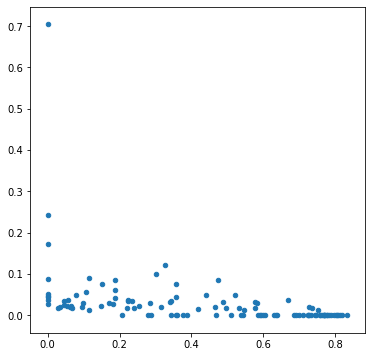

In [65]:
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], s=20)

In [67]:
normalized_Data.sample(10)

,runs_scored,bowling_economy
90,0.767799,0.000000
9,0.344276,0.035432
28,0.769123,0.000000
41,0.300774,0.100258
47,0.532288,0.016506
79,0.418850,0.014020
77,0.772640,0.000000
81,0.028358,0.017449
27,0.239251,0.016900
51,0.728482,0.000000


In [77]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=0, n_init=2)

In [78]:
y_km = km.fit_predict(X)

In [79]:
km.labels_

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

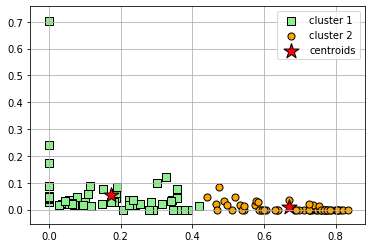

In [80]:
K = 2

plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)


# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

# 3. Redo question-2 on different values of K = 2,3,4,5. For each case, draw the plot of clusters as stated above. Visualize these plots, copy the plot diagrams in the word document,  and comment on which is better clustering (and reasons) based on visualization only. [3 points]

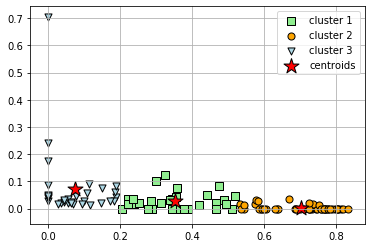

In [83]:
K =3

km = KMeans(n_clusters=3, random_state=0, n_init=2)
y_km = km.fit_predict(X)

plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

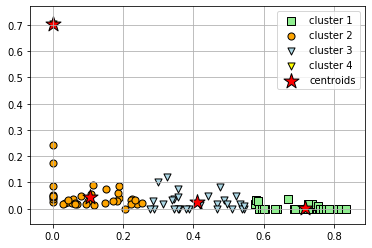

In [84]:
k = 4

km = KMeans(n_clusters=4, random_state=0, n_init=2)
y_km = km.fit_predict(X)

plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    X[y_km == 3, 0], X[y_km == 3, 1],
    s=50, c='yellow',
    marker='v', edgecolor='black',
    label='cluster 4'
)
# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

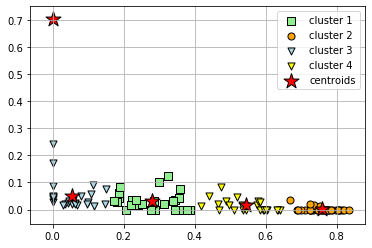

In [85]:
K = 5

km = KMeans(n_clusters=5, random_state=0, n_init=2)
y_km = km.fit_predict(X)

plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    X[y_km == 3, 0], X[y_km == 3, 1],
    s=50, c='yellow',
    marker='v', edgecolor='black',
    label='cluster 4'
)
# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()